<a href="https://colab.research.google.com/github/Krithika-Sulochana-08/Design-Implementation-of-1-Bit-Full-Adder-using-Cadence-Tools/blob/main/ARRYTHMIA_ML_PAPER_UPDATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wfdb imbalanced-learn xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 101.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
records = ['100', '101', '102', '103', '104']
base_path = 'mitdb'
wfdb.dl_database('mitdb', dl_dir=base_path, records=records)

target_classes = {'N': 0, 'L': 1, 'R': 2, 'A': 3, 'V': 4}
samples_before = int(0.2 * 360)
samples_after = int(0.4 * 360)
segment_length = samples_before + samples_after

X_all, y_all = [], []
for record_name in records:
    record = wfdb.rdrecord(f'{base_path}/{record_name}')
    annotation = wfdb.rdann(f'{base_path}/{record_name}', 'atr')
    signal = record.p_signal[:, 0]

    for i, r in enumerate(annotation.sample):
        label = annotation.symbol[i]
        if label not in target_classes:
            continue
        start = r - samples_before
        end = r + samples_after
        if start < 0 or end > len(signal):
            continue
        segment = signal[start:end]
        if len(segment) == segment_length:
            X_all.append(segment)
            y_all.append(target_classes[label])

X_all = np.array(X_all)
y_all = np.array(y_all)
print("✅ Data shape:", X_all.shape)
print("📊 Class distribution:", Counter(y_all))


Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating list of all files for: 100
Generating list of all files for: 101
Generating list of all files for: 102
Generating list of all files for: 103
Generating list of all files for: 104
Created local base download directory: mitdb
Finished downloading files
✅ Data shape: (6486, 216)
📊 Class distribution: Counter({np.int64(0): 6441, np.int64(3): 38, np.int64(4): 7})


In [ ]:
X_flat = X_all.reshape(X_all.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y_all, test_size=0.2, stratify=y_all, random_state=42
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("✅ After SMOTE:", Counter(y_train_res))


✅ After SMOTE: Counter({np.int64(0): 5152, np.int64(3): 5152, np.int64(4): 5152})



🔹 Training Random Forest...

📊 Random Forest Classification Report:
              precision    recall  f1-score   support

           N       0.99      1.00      1.00      1289
           A       0.00      0.00      0.00         0
           V       0.00      0.00      0.00         0

    accuracy                           0.99      1298
   macro avg       0.60      0.42      0.44      1298
weighted avg       0.99      0.99      0.99      1298



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 5, does not match size of target_names, 3
  warnings.warn(


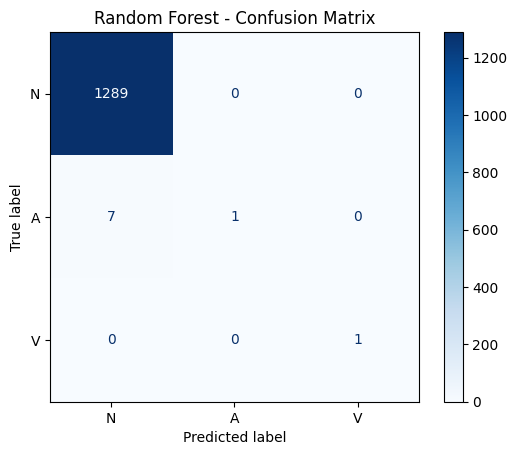


🔹 Training SVM...

📊 SVM Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.98      0.99      1289
           A       0.00      0.00      0.00         0
           V       0.00      0.00      0.00         0

    accuracy                           0.98      1298
   macro avg       0.44      0.55      0.46      1298
weighted avg       0.99      0.98      0.99      1298



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 5, does not match size of target_names, 3
  warnings.warn(


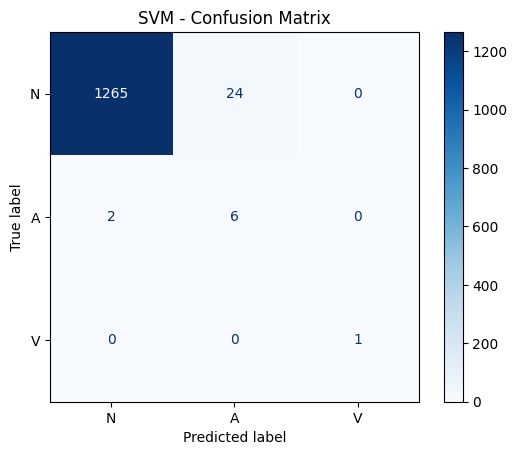


🔹 Training KNN...

📊 KNN Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.97      0.98      1289
           A       0.00      0.00      0.00         0
           V       0.00      0.00      0.00         0

    accuracy                           0.96      1298
   macro avg       0.41      0.44      0.41      1298
weighted avg       0.99      0.96      0.98      1298



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 5, does not match size of target_names, 3
  warnings.warn(


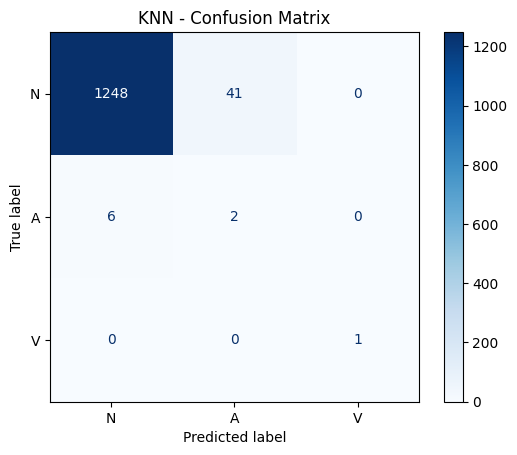


🔹 Training Logistic Regression...

📊 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.98      0.99      1289
           A       0.00      0.00      0.00         0
           V       0.00      0.00      0.00         0

    accuracy                           0.97      1298
   macro avg       0.23      0.35      0.25      1298
weighted avg       0.99      0.97      0.98      1298



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:2687: UserWarning: labels size, 5, does not match size of target_names, 3
  warnings.warn(


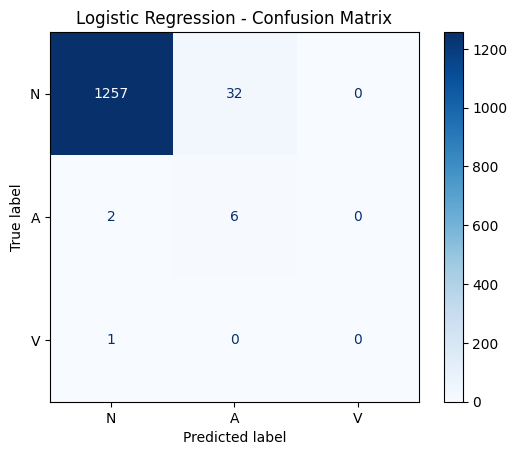


🔹 Training XGBoost...
⚠️ Skipping XGBoost: Only found classes [0 3 4], need all 5 for num_class=5.


In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

label_map = {0: 'N', 1: 'L', 2: 'R', 3: 'A', 4: 'V'}
target_names = [label_map[i] for i in sorted(set(y_test))]

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective="multi:softprob")
}

trained_models = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")

    # ⚠️ Special handling for XGBoost
    if name == "XGBoost":
        unique_classes = np.unique(y_train_res)
        if len(unique_classes) < 5:
            print(f"⚠️ Skipping XGBoost: Only found classes {unique_classes}, need all 5 for num_class=5.")
            continue
        model.set_params(num_class=5)

    try:
        model.fit(X_train_res, y_train_res)
        trained_models[name] = model

        y_pred = model.predict(X_test)

        print(f"\n📊 {name} Classification Report:")
        print(classification_report(
            y_test, y_pred,
            labels=[0, 1, 2, 3, 4],  # Always include all classes
            target_names=target_names,
            zero_division=0          # Prevent warning for undefined precision
        ))

        ConfusionMatrixDisplay.from_predictions(
            y_test, y_pred,
            display_labels=target_names,
            cmap='Blues'
        )
        plt.title(f"{name} - Confusion Matrix")
        plt.show()

    except Exception as e:
        print(f"❌ {name} failed: {str(e)}")


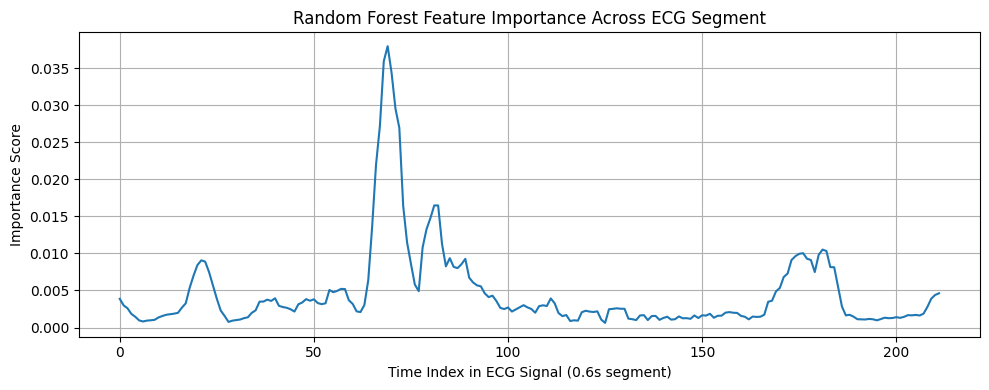

In [ ]:
# Plot feature importance for Random Forest
rf_model = trained_models.get("Random Forest")

if rf_model:
    importances = rf_model.feature_importances_

    # Smooth the scores for easier visualization
    window_size = 5
    smoothed = np.convolve(importances, np.ones(window_size)/window_size, mode='valid')

    plt.figure(figsize=(10, 4))
    plt.plot(smoothed)
    plt.title("Random Forest Feature Importance Across ECG Segment")
    plt.xlabel("Time Index in ECG Signal (0.6s segment)")
    plt.ylabel("Importance Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Random Forest model not available. Skipping feature importance.")


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    results.append((name, round(acc, 4), round(f1, 4)))

# Display as DataFrame
import pandas as pd
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Macro F1"])
print(df_results)


                 Model  Accuracy  Macro F1
0        Random Forest    0.9946    0.7398
1                  SVM    0.9800    0.7685
2                  KNN    0.9638    0.6866
3  Logistic Regression    0.9730    0.4157


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv_scores = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    try:
        scores = cross_val_score(model, X_flat, y_all, cv=skf, scoring='accuracy', error_score='raise')
        cv_scores[name] = scores
        print(f"{name} → Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    except Exception as e:
        print(f"{name} failed during CV: {str(e)}")


Random Forest → Accuracy: 0.9937 ± 0.0003
SVM → Accuracy: 0.9935 ± 0.0004
KNN → Accuracy: 0.9938 ± 0.0008
Logistic Regression → Accuracy: 0.9937 ± 0.0006
XGBoost failed during CV: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [0 3 4]
